In [1]:
import pandas as pd

In [2]:
_2021 = pd.read_csv('_2021.csv', encoding='utf-8')
_2021['Injeção na rede (kWh)'].fillna("None", inplace=True)

_2022 = pd.read_csv('_2022.csv', encoding='utf-8')
_2022['Injeção na rede (kWh)'].fillna("None", inplace=True)

all = pd.concat([_2021, _2022], ignore_index=True)
all.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  object 
 4   Data & Hora              11016 non-null  object 
 5   temp                     11016 non-null  float64
 6   feels_like               11016 non-null  float64
 7   temp_min                 11016 non-null  float64
 8   temp_max                 11016 non-null  float64
 9   pressure                 11016 non-null  int64  
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  clouds_all               11016 non-null  int64  
 13  weather_description      11016 non-null  object 
dtypes: float64(8), int64(3

In [4]:
all.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data & Hora,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
0,0.0,0.0,0.0,None,2021-09-29 00:00:00,13.97,13.54,11.45,14.04,1027,81,1.96,87,overcast clouds
1,0.0,0.0,0.0,None,2021-09-29 01:00:00,13.48,13.02,13.43,13.90,1028,82,1.83,91,overcast clouds
2,0.0,0.0,0.0,None,2021-09-29 02:00:00,12.93,12.47,12.72,13.43,1027,84,1.96,93,overcast clouds
3,0.0,0.0,0.0,None,2021-09-29 03:00:00,12.61,12.15,10.34,12.93,1027,85,1.85,95,overcast clouds
4,0.0,0.0,0.0,None,2021-09-29 04:00:00,12.61,12.17,9.79,12.93,1027,86,1.83,93,overcast clouds


In [5]:
import numpy as np

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
all.drop('Data & Hora', axis=1, inplace=True)

In [7]:
#Hot
weather_description = pd.get_dummies (all['weather_description'], drop_first=True)
all.drop('weather_description', axis=1, inplace=True)
all = pd.concat ([all, weather_description], axis=1)

#label

In [8]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  object 
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  clouds_all               11016 non-null  int64  
 12  few clouds               11016 non-null  bool   
 13  heavy intensity rain     11016 non-null  bool   
 14  light rain            

In [43]:
X = all.drop(['Injeção na rede (kWh)'], axis=1)
y = all['Injeção na rede (kWh)'].to_frame()

<Axes: >

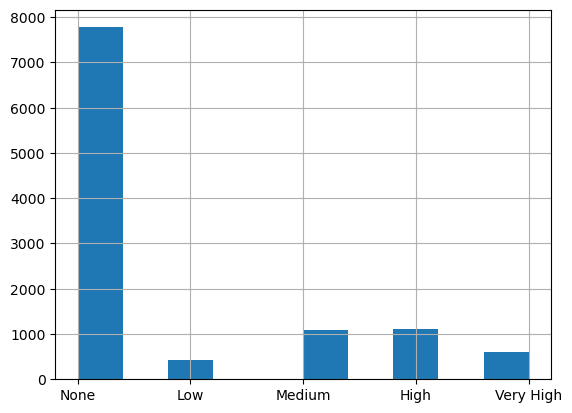

In [44]:
all['Injeção na rede (kWh)'].hist()

In [45]:
kmean = KMeans(n_clusters=5, n_init = 10, random_state=2022)
kmean.fit (X)

KMeans(n_clusters=5, n_init=10, random_state=2022)

In [46]:
_categoria = {"None": 0, "Low": 0, "Medium": 0, "High": 0, "Very High": 0}

for i in range (0, 11016):
    _categoria[all['Injeção na rede (kWh)'][i]] += 1

_categoria

{'None': 7777, 'Low': 432, 'Medium': 1098, 'High': 1103, 'Very High': 606}

In [47]:
_t = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

for i in range (0, 11016):
    _t[kmean.labels_[i]] += 1

_t

{0: 2449, 1: 3910, 2: 1562, 3: 1961, 4: 1134}

In [48]:
y_pred = kmean.predict (X)

In [49]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [99]:
#n = Y['Injeção na rede (kWh)']
_map = {"None": 1, "Low": 0, "Medium": 3, "High": 2, "Very High": 4} 
lista = []
for i in range (0, 11015+1):
    lista.append (_map[y['Injeção na rede (kWh)'][i]])

In [100]:
print ( classification_report (lista, y_pred) )

              precision    recall  f1-score   support

           0       0.02      0.11      0.03       432
           1       0.87      0.44      0.59      7777
           2       0.28      0.40      0.33      1103
           3       0.13      0.23      0.16      1098
           4       0.11      0.21      0.14       606

    accuracy                           0.39     11016
   macro avg       0.28      0.28      0.25     11016
weighted avg       0.67      0.39      0.47     11016



In [ ]:
clf = SVC (random_state=2021, C=5000.0, gamma=0.0001, kernel='rbf')
scores = cross_val_score(clf, X, y.values.ravel(), cv=10)

print ("%.2f %.2f" % (scores.mean(), scores.std()))